# Understanding Visitor Use in U.S. National Parks Using Cellphone GPS data

#### GEOG 489 2022 Spring Group Project

#### Team members: Chang Cai, Eleanor Lynn Hollas, Jordan Victoria Parker, Piper Josephine Siblik


## Part 1: presentation

### 1. Project overview:
#### 1.1 Project goals:

* Validate SafeGraph data with traditional National Park Service (NPS) monthly visitor use counts
* Investigate traffic congestion based on Safegraph data

#### 1.2  Project motivation:
* Real-time visitation data can help park manager in planning of infrastructure and mitigating the impact of overcrowding.
* Current official visitation records are of limited granularity and are generally expensive to collect.
* Safegraph data, which has previously been utilized to study human mobility patterns, could be used as a substitute for identifying spatial and temporal variation in visitation.

### 2. Implementation: 

#### 2.1 Data sources: 
| Name/source | Description | Format |
| :-- | :-- | :-- |
| POI visitor counts (Safegraph) | Contains information on the number of people that stop at POIs all over the US which can be downloaded by zipcode on the website. Data is gathered through location services on smartphones which offers a sample of the whole population. | ```location_name = "Jordan Pond House"```<br>```Placekey = "zzy-222@64v-dvx-v75"```<br>```naics_code = "722511"```<br>```latitude = 44.32057```<br>```longitude = -68.246385```<br>```date_range_start = 2020-06-01T00:00:00-04:00```<br>```visits_by_day = [0,2,3,5,6,3,5,19,38,4,5,6, …]```|
| Park visitor counts (NPS) | Contains quality controlled data collected from park staff to get an accurate count of the total number of visitors at a park each month using the person-per-vehicle factor. This single csv file contains information for all the parks in the NPS. | ```ParkName = "Acadia NP"```<br>```UnitCode = "ACAD"```<br>```Year = 2019```<br>```Month = 1```<br>```RecreationVisits = "10,520"```|
| Park boundaries (NPS) | Shapefile provided by the NPS that contains the boundaries of all parks in the NPS as multipolygons. | ```UNIT_CODE = "ACAD"```<br>```geometry = …```|
| Entrance locations (NPS) | CSV file containing entrance locations of each park under investigation that was manually created using NPS websites for the park and google maps.|```unitCode = "ACAD"```<br>```entrance = "hulls cove"```<br>```lat_lon = 44.381534013388006, -68.06868817972637```|

#### 2.2 Analysis:

* Data cleaning
<img src="./img/flow_1.jpg" width="800"/>
* Data validation
<img src="./img/flow_2.png" width="800"/>
<img src="./img/flow_3.jpg" width="800"/>
* Road network analysis
<img src="./img/flow_4.jpg" width="800"/>


### 3. Result discussion 

#### 3.1 Visually compare the Safegraph data with the NPS official visiation data:
* __First difference correlation__ provides a more accurate assessment of correlation for non-stationary time series data because it considers the difference in value between one data point and the next. To determine how closely the Safegraph cell phone data captures National Park visitation we will be utilizing these first difference correlations. 

    1) Results from <font color=green>__Glacier__</font>:
    ![](./img/monthly_GLAC.png)
    * The first difference correlation between the first difference of Safegraph and NPS monthly series is 0.8316. The first difference correlation is good but Safegraph overestimated the 2020’s visitation. 
    * Glacier NP reported that due to their new visitor registration system they had no way of reporting non-recreational visits to the park for the summer of 2020 which would account for this discrepancy, as SafeGraph records all visitation regardless of recreational or not. 

    2) Results from <font color=green>__Great Smoky__</font>:
    ![](./img/monthly_GRSM.png)
    * GRSM first difference correlation: 0.75. GRSM correlation is relatively strong but faces some issues with the Safe Graph data underrepresenting visitation during the fall months. 
    * Due to closures in April 2020 for COVID you can see a severe drop in visitation for that month from both Safe Graph and NPS data. They reopened in May and the numbers increased rapidly from then on before falling back into normal trends. 
    
    3) Results from <font color=green>__Zion__</font>:
    ![](./img/monthly_ZION.png)
    
    4) Results from <font color=green>__Yellowstone__</font>:
    ![](./img/monthly_YELL.png)
    * Yellowstone had a very good first-differenced correlation = 0.8816, hence more representative of the visitor population
    
    5) Results from <font color=green>__Acadia__</font>:
    ![](./img/monthly_ACAD.png)
    * With a correlation of first differences equal to .93, the Safe Graph and NPS data is shown to be highly correlated for this park. 
    * The summer of 2021 is the worst fit, with no discernible reason for why the Safegraph data underestimates this time period. This is probably due to a multitude of factors, one being that since July 2021 the Acacia NP visitor calculation system has been non-functional and they have been using estimations. Another explanation could be explained through the dominance of the Jordan Pond House restaurant POI and the various ways that COVID 19 affected restaurant attendance. 
    * This correlation might be taken with a grain of salt, considering it had the lowest number of POIs. With this in consideration, Yellowstone which has a higher number of POIs, also had a high first difference correlation and might be seen as a more credible example of SafeGraph data validation. 


#### 2.2 Comparing the KDE maps across years, we observe that the distribution of visitation derive from Safegraph changed due to multiple reasons.

1) Results from <font color=green>__Glacier__</font>: 
<img src="./img/kde_GLAC.png" width="500"/>

The safe graph data of Glacier is somewhat unstable due to the fact that:
- A couple of POIs stopped reporting data in 2020. In total, there are 14 POIs found within the Glacier, but only 11 are reporting data in 2020.
- This sudden drop in the number of “active” POIs can also be observed from the skinny cluster on 2020’s heatmap. 

2) Results from <font color=green>__Great Smoky__</font>: 
<img src="./img/kde_GRSM.png" width="500"/>

99 POIS is the most abundant, providing more accurate spatial data:
- You can observe the visitors expanding to the southern part of the park in more recent years/months, this trend is also visible in Yellowstone, another park with a large amount of POIs.

3) Results from <font color=green>__Zion__</font>: 
<img src="./img/kde_ZION.png" width="500"/>

4) Results from <font color=green>__Yellowstone__</font>: 
<img src="./img/kde_YELL.png" width="500"/>
55 POIS is a robust sample, providing more trustworthy data.

5) Results from <font color=green>__Acadia__</font>: 
<img src="./img/kde_ACAD.png" width="500"/>
Only 10 POIs found within the park. If the number of POI is small, Safegraph data doesn’t seem to capture NPS visitation that well.

#### 3.3 Road network analysis
For Great Smoky NP: Compare the interactive maps of Aug.1 2018 with that of Aug.1 2021. Did we observe an increase/decrease in the congestion in the road network after the pandemic?
* Traffic conditions on Aug 02, 2018: __Click__ <a href=./map/network_GRSM_2018-08-02.html>map of Aug 02, 2018</a>
* Traffic conditions on Aug 01, 2021: __Click__ <a href=./map/network_GRSM_2021-08-01.html>map of Aug 01, 2021</a>

## Part 2: Code demo, an example of Glacier National Park

### 1. Data cleaning (not run)
- Input: 
    - SafeGraph pattern dataset downloaded at the state level (`MT.csv`)
    - Park boundary (`nps_boundary.shp`)
- Process: spatial subsetting, geocoding
- Results: 
    - Daily visiation time series of in-park POIs 
    - A GeoJSON file that contains these in-park POIs for subsequent analysis
    
```python
# Load data and convert dataframe to geodataframe using lon and lat columns
boundary = gpd.read_file('../raw_data/nps_boundary/nps_boundary.shp') # boundary shapefile
boundary = boundary.set_index('UNIT_CODE') 
df = pd.read_csv('../raw_data/SafeGraph/MT.csv') # safegraph data
gdf = gpd.GeoDataFrame(df, 
                       crs = "EPSG:4269",
                       geometry = gpd.points_from_xy(df.sg_c__longitude, df.sg_c__latitude))

# Geocode POIs with missing lot-lat info
gdf_na = gdf[gdf['geometry'].is_empty] 
gdf_na["address"] = gdf_na['sg_mp__street_address'] + ', ' +  gdf_na['sg_mp__city'] + ', ' + gdf_na['sg_mp__region'] + ' ' + gdf_na['sg_mp__postal_code'].astype(int).astype(str)gdf_na['sg_mp__postal_code'].astype(int).astype(str)
na_poi = gdf_na[['placekey', 'address']].drop_duplicates()
geo = geocode(na_poi['address'], provider='nominatim', user_agent = 'autogis_xx')
geo['geometry'].intersects(boundary.at[park, 'geometry']).sum() # check these POIs don't fall within park boundary, so disregard them

# Subset POIs located within the park boundary of Glacier NP
subset_gdf = gdf.loc[gdf['geometry'].intersects(boundary.at['GLAC', 'geometry'])]
subset_gdf = subset_gdf.dropna(subset = ['sg_mp__visits_by_day']) # drop NA in the daily visitation column due to data error

# Explode daily visitation column to multiple rows
subset_gdf.sg_mp__visits_by_day = subset_gdf.sg_mp__visits_by_day.apply(literal_eval) # convert from string to JSON list
subset_gdf = subset_gdf.explode('sg_mp__visits_by_day') # explode it vertically and have each row representing a day

# Create date column to indicate the exact date of year
subset_gdf['n_of_day'] = subset_gdf.groupby(['date_range_start','placekey']).cumcount()
subset_gdf['date_range_start'] = pd.DatetimeIndex(subset_gdf.date_range_start) # convert from string to date
subset_gdf['date'] = pd.DatetimeIndex(subset_gdf.date_range_start) + pd.to_timedelta(subset_gdf['n_of_day'], unit = 'd')

# save a subset of POIs as GeoJSON file.
subset_gdf.to_file('../clean_data/POI_GLAC.geojson', driver = 'GeoJSON')

```

### 2. Data validation
- Input: 
    - GeoJSON file that contains POIs found within the Glacier park boundary  (`GeoJSON`)
    - NPS monthly visitor counts (`nps_visit_2015_2021.csv`)
- Tasks: temporal aggregation, merging
- Results: 
    - A time series plot comparing two data sources
    - A density plot to gauge the spatial dynamics

In [1]:
# !pip install geoplot

In [2]:
import geopandas as gpd  
import pandas as pd
from geopandas.tools import geocode
from ast import literal_eval
import matplotlib.pyplot as plt
import geoplot
import osmnx as ox
import networkx as nx
from tqdm import tqdm, trange

Load the cleaned GeoJSON file:

In [3]:
# Load saved GeoJSON 
subset_gdf = gpd.read_file('./data/POI_GLAC.geojson')

# load park boundary
boundary = gpd.read_file('./data/nps_boundary.geojson')
boundary = boundary.set_index('UNIT_CODE') 

# convert variable to propoer format
subset_gdf['date_range_start'] = pd.DatetimeIndex(subset_gdf.date_range_start) # convert to datetime
subset_gdf['sg_mp__visits_by_day'] = pd.to_numeric(subset_gdf['sg_mp__visits_by_day']) # convert to numeric
subset_gdf.head()

date_range_start date_range_end             placekey sg_c__parent_placekey  \
0       2021-08-01     2021-09-01  zzy-222@3wy-prx-xwk                  None   
1       2021-08-01     2021-09-01  zzy-222@3wy-prx-xwk                  None   
2       2021-08-01     2021-09-01  zzy-222@3wy-prx-xwk                  None   
3       2021-08-01     2021-09-01  zzy-222@3wy-prx-xwk                  None   
4       2021-08-01     2021-09-01  zzy-222@3wy-prx-xwk                  None   

               sg_c__location_name sg_c__safegraph_brand_ids sg_c__brands  \
0  Jammer Joe's Grill and Pizzeria                      None         None   
1  Jammer Joe's Grill and Pizzeria                      None         None   
2  Jammer Joe's Grill and Pizzeria                      None         None   
3  Jammer Joe's Grill and Pizzeria                      None         None   
4  Jammer Joe's Grill and Pizzeria                      None         None   

                    sg_c__top_category        sg_c__sub_category  \
0  Restaurants and Other Eating Places  Full-Service Restaurants   
1  Restaurants and Other Eating Places  Full-Service Restaurants   
2  Restaurants and Other Eating Places  Full-Service Restaurants   
3  Restaurants and Other Eating Places  Full-Service Restaurants   
4  Restaurants and Other Eating Places  Full-Service Restaurants   

   sg_c__naics_code  ...                           sg_mp__popularity_by_day  \
0          722511.0  ...  {'Monday': 10, 'Tuesday': 16, 'Wednesday': 12,...   
1          722511.0  ...  {'Monday': 10, 'Tuesday': 16, 'Wednesday': 12,...   
2          722511.0  ...  {'Monday': 10, 'Tuesday': 16, 'Wednesday': 12,...   
3          722511.0  ...  {'Monday': 10, 'Tuesday': 16, 'Wednesday': 12,...   
4          722511.0  ...  {'Monday': 10, 'Tuesday': 16, 'Wednesday': 12,...   

           sg_mp__device_type sg_mp__normalized_visits_by_state_scaling  \
0  {'android': 29, 'ios': 22}                                1040.77628   
1  {'android': 29, 'ios': 22}                                1040.77628   
2  {'android': 29, 'ios': 22}                                1040.77628   
3  {'android': 29, 'ios': 22}                                1040.77628   
4  {'android': 29, 'ios': 22}                                1040.77628   

  sg_mp__normalized_visits_by_total_visits  \
0                                 0.000013   
1                                 0.000013   
2                                 0.000013   
3                                 0.000013   
4                                 0.000013   

  sg_mp__normalized_visits_by_total_visitors  \
0                                   0.000037   
1                                   0.000037   
2                                   0.000037   
3                                   0.000037   
4                                   0.000037   

   sg_mp__normalized_visits_by_region_naics_visits  \
0                                         0.000125   
1                                         0.000125   
2                                         0.000125   
3                                         0.000125   
4                                         0.000125   

  sg_mp__normalized_visits_by_region_naics_visitors  n_of_day  \
0                                          0.000194         0   
1                                          0.000194         1   
2                                          0.000194         2   
3                                          0.000194         3   
4                                          0.000194         4   

                  date                     geometry  
0  2021-08-01T00:00:00  POINT (-113.87642 48.61768)  
1  2021-08-02T00:00:00  POINT (-113.87642 48.61768)  
2  2021-08-03T00:00:00  POINT (-113.87642 48.61768)  
3  2021-08-04T00:00:00  POINT (-113.87642 48.61768)  
4  2021-08-05T00:00:00  POINT (-113.87642 48.61768)  

[5 rows x 56 columns]

Aggreagate safegraph daily visitaiton to the park-month level: by `'date_range_start'`(column for year-month)

In [4]:
park_month = subset_gdf.groupby('date_range_start')['sg_mp__visits_by_day'].sum().to_frame()

Load NPS monthly visitor counts:

In [5]:
nps = pd.read_csv('./data/nps_visit_2015_2021.csv')
nps = nps[nps['UnitCode']  == 'GLAC'] # filter data for Glacier only
nps['RecreationVisits'] = nps['RecreationVisits'].str.replace(",", "").astype(float) # convert to numeric data
# Create a column to indicate year-month
nps['date'] = pd.to_datetime(nps[['Year', 'Month']].assign(DAY = 1))

**Merge** Safegraph monthly data to NPS visitation:

In [6]:
month_df = nps.set_index('date').join(park_month, how = 'inner') # Inner join by year-month column
month_df['sg_mp__visits_by_day'] = pd.to_numeric(month_df['sg_mp__visits_by_day']) # convert to numeric
month_df.head()

ParkName UnitCode       ParkType          Region State  Year  \
2018-01-01  Glacier NP     GLAC  National Park  Intermountain     MT  2018   
2018-02-01  Glacier NP     GLAC  National Park  Intermountain     MT  2018   
2018-03-01  Glacier NP     GLAC  National Park  Intermountain     MT  2018   
2018-04-01  Glacier NP     GLAC  National Park  Intermountain     MT  2018   
2018-05-01  Glacier NP     GLAC  National Park  Intermountain     MT  2018   

            Month  RecreationVisits NonRecreationVisits RecreationHours  ...  \
2018-01-01      1           12222.0                  14          49,913  ...   
2018-02-01      2           11847.0                  24          48,261  ...   
2018-03-01      3           21758.0                  18          90,075  ...   
2018-04-01      4           28404.0                  70         120,797  ...   
2018-05-01      5          195116.0                 375       1,012,270  ...   

           RecreationHoursTotal NonRecreationHoursTotal  \
2018-01-01           32,211,332                 118,373   
2018-02-01           32,211,332                 118,373   
2018-03-01           32,211,332                 118,373   
2018-04-01           32,211,332                 118,373   
2018-05-01           32,211,332                 118,373   

           ConcessionerLodgingTotal ConcessionerCampingTotal TentCampersTotal  \
2018-01-01                  107,156                        0          110,507   
2018-02-01                  107,156                        0          110,507   
2018-03-01                  107,156                        0          110,507   
2018-04-01                  107,156                        0          110,507   
2018-05-01                  107,156                        0          110,507   

           RVCampersTotal BackcountryTotal NonRecreationOvernightStaysTotal  \
2018-01-01        109,566           32,349                                0   
2018-02-01        109,566           32,349                                0   
2018-03-01        109,566           32,349                                0   
2018-04-01        109,566           32,349                                0   
2018-05-01        109,566           32,349                                0   

           MiscellaneousOvernightStaysTotal sg_mp__visits_by_day  
2018-01-01                            1,178                   71  
2018-02-01                            1,178                   61  
2018-03-01                            1,178                  137  
2018-04-01                            1,178                  168  
2018-05-01                            1,178                 1072  

[5 rows x 36 columns]

#### 2.1 **Time series plot**: validate two datasets on the time dimension

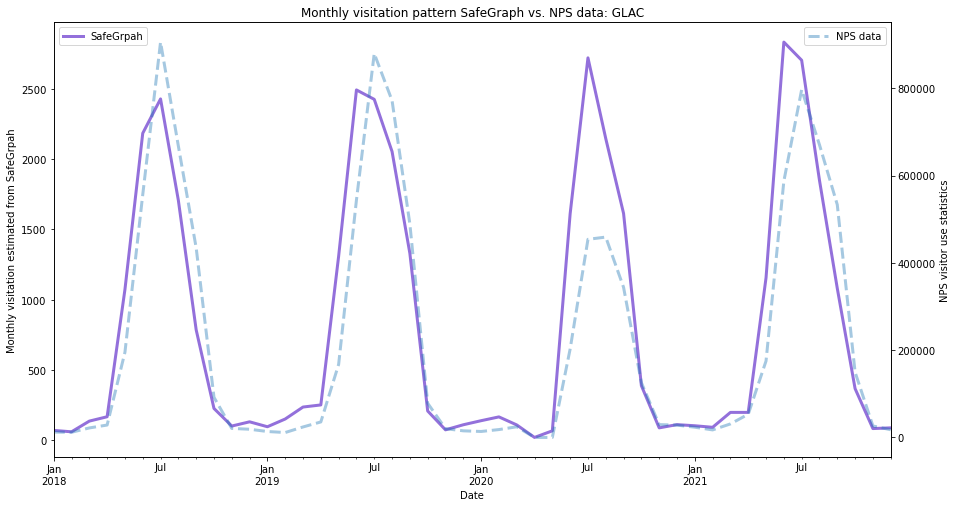

In [7]:
f, a = plt.subplots(figsize = (15, 8))
month_df['sg_mp__visits_by_day'].plot(ax = a, color = 'mediumpurple', label = "SafeGrpah", lw = 3)
plt.legend(loc = "upper left")
a2 = a.twinx()
month_df['RecreationVisits'].plot(ax = a2, linestyle = "--", alpha = .4, label = "NPS data", lw = 3)
plt.legend(loc = "upper right")

plt.legend()
a.set(xlabel = "Date",
      ylabel = "Monthly visitation estimated from SafeGrpah",
      title = f"Monthly visitation pattern SafeGraph vs. NPS data: GLAC")
a2.set(ylabel = "NPS visitor use statistics");

In addition, calculate **Pearson correlation** between Safegraph and NPS monthly times series:

In [8]:
# calculate correlation
corr = month_df['sg_mp__visits_by_day'].corr(month_df['RecreationVisits'])
# calculate the correlation between first differnced time series
corr_l1 = month_df[['sg_mp__visits_by_day', 'RecreationVisits']].diff().corr().iloc[0, 1]

print(f'''The Pearson correlation between Safegraph and NPS data is {round(corr, 2)}.''')
print(f'''The Pearson correlation between first-differnced Safegraph and NPS data is {round(corr_l1, 2)}.''')

The Pearson correlation between Safegraph and NPS data is 0.91.
The Pearson correlation between first-differnced Safegraph and NPS data is 0.83.


#### 2.2 **Density plot**: gauge the spatial dynamics of visitation derived from Safegraph over time

Aggregate safegraph daily visitaiton to the POI-month level: by `'placekey'`(an indicator for POI) and`'date_range_start'`(column for month):

In [9]:
poi_month = subset_gdf.groupby(['placekey', 'date_range_start'])['sg_mp__visits_by_day'].sum().to_frame()

Extract geo-coordinates of each POI and merge to the newly created `poi_month`:

In [10]:
lon_lat = subset_gdf[['placekey', 'geometry']].drop_duplicates().set_index('placekey')
poi_month = poi_month.join(lon_lat, how = 'left').sort_values(by = "date_range_start") # merge & sort by date

# Convert the dataframe to geodataframe:
poi_month_gdf = gpd.GeoDataFrame(poi_month, 
                                 crs = "EPSG:4269", 
                                 geometry = poi_month.geometry)

For density plot, we focus on __peak visitation season (May to Oct)__. Here we select months to generate the density plot: 

In [11]:
temp = poi_month_gdf.reset_index()
temp = temp[temp['date_range_start'].dt.month.isin(range(5,10))]
temp.head()

placekey date_range_start  sg_mp__visits_by_day  \
31  zzy-225@3wy-prx-td9       2018-05-01                    55   
32  zzy-222@3wy-q29-8vz       2018-05-01                   315   
33  zzy-226@3wy-prx-td9       2018-05-01                    38   
34  zzw-222@3wy-q29-d9z       2018-05-01                   279   
35  zzy-224@3wy-prx-td9       2018-05-01                    25   

                       geometry  
31  POINT (-113.87915 48.61743)  
32  POINT (-113.99403 48.52759)  
33  POINT (-113.87918 48.61740)  
34  POINT (-113.99294 48.52874)  
35  POINT (-113.87916 48.61739)

Density plot of monthly visits to Safegraph POIs overlayed with the Glacier boundary:

C:\Users\simizicee\AppData\Local\Temp\ipykernel_37232\3215083758.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  proj = geoplot.crs.AlbersEqualArea(central_latitude = boundary[boundary.index == 'GLAC'].centroid.y[0],
C:\Users\simizicee\AppData\Local\Temp\ipykernel_37232\3215083758.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  central_longitude = boundary[boundary.index == 'GLAC'].centroid.x[0])


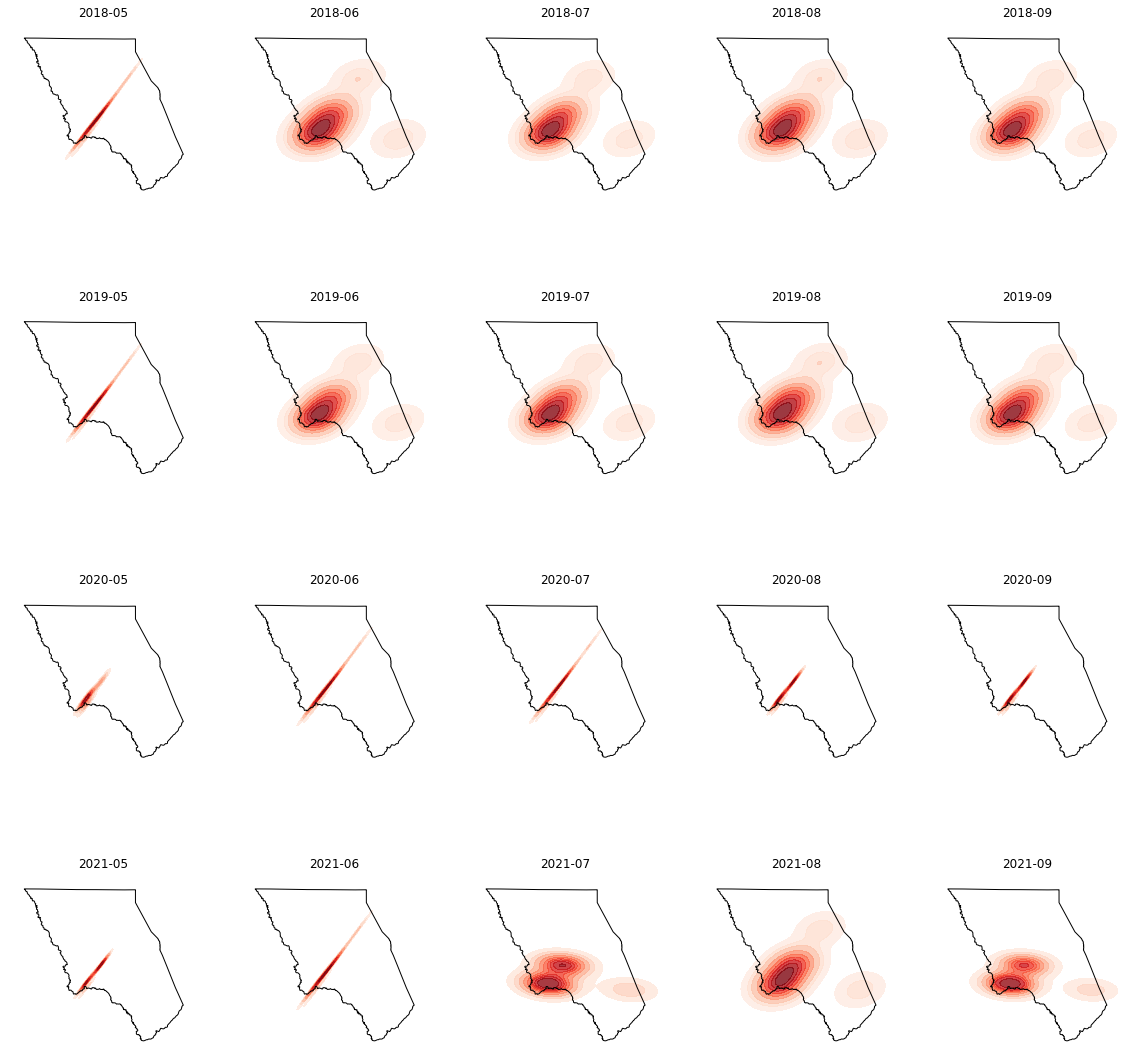

In [12]:
proj = geoplot.crs.AlbersEqualArea(central_latitude = boundary[boundary.index == 'GLAC'].centroid.y[0], 
                                   central_longitude = boundary[boundary.index == 'GLAC'].centroid.x[0])
months = temp['date_range_start'].unique()

plt.figure(figsize = (20, 20))

for idx, month in enumerate(months):

    ax = plt.subplot(4, 5, idx + 1, projection = proj)
    geoplot.kdeplot(temp[temp['date_range_start'] == month], 
                    # clip = boundary[boundary.index == 'GLAC'].geometry,
                    shade = True, 
                    cmap = 'Reds', 
                    #thresh = 0.2, 
                    levels = 10,
                    alpha = 0.8, 
                    projection = proj,
                    #cbar = True,
                    vmin = 0, 
                    #vmax = 309,
                    ax = ax)
    geoplot.polyplot(boundary[boundary.index == 'GLAC'], ax = ax, zorder = 1)
    ax.set_title(month.astype('datetime64[M]')) # convert to year-month

### 3. Road network analysis
- Input: 
    - GeoJSON file that contains POIs found within the Glacier park boundary  (`GeoJSON`)
    - Park boundary (`nps_boundary.shp`)
    - Geo-locations of park's entrance stations(`entrance_coord.csv`)
- Tasks: temporal aggregation, merging
- Results: 
    - A time series plot comparing two data sources
    - A density plot to gauge the spatial dynamics

In [13]:
from IPython.display import Image
from IPython.display import HTML

Load entrance station locations:

In [14]:
entry = pd.read_csv(f'./data/entrance_coord.csv')

# split by "," to create lontitude and latitude columns
lat = []
lon = []

for row in entry['lat_lon']:
    lat.append(row.split(',')[0]) # Split the row by comma and append
    lon.append(row.split(',')[1])
        
# Create two new columns from lat and lon
entry['lat'] = lat
entry['lon'] = lon

# convert to geodataframe
entry_gdf = gpd.GeoDataFrame(entry, 
                             crs = "EPSG:4269",
                             geometry = gpd.points_from_xy(entry.lon, entry.lat))

# filter the entrance stations for Glacier
entry_gdf = entry_gdf[entry_gdf.unitCode == 'GLAC'].reset_index(drop = True) 
entry_gdf

unitCode          entrance                                 lat_lon  \
0     GLAC     West Entrance   48.50642809317048, -113.9876462668435   
1     GLAC             Camas  48.58720431401561, -114.03313537578087   
2     GLAC        Polebridge  48.78354575523783, -114.28056051716855   
3     GLAC      Many Glacier  48.82248401654224, -113.57974127136741   
4     GLAC      Saint Mary's  48.74693105028238, -113.43933340609424   
5     GLAC      Two Medicine  48.50504411336611, -113.33000493600153   
6     GLAC  Walton/Goat Lick  48.25888956992005, -113.57509950229125   

                 lat                   lon                     geometry  
0  48.50642809317048    -113.9876462668435  POINT (-113.98765 48.50643)  
1  48.58720431401561   -114.03313537578087  POINT (-114.03314 48.58720)  
2  48.78354575523783   -114.28056051716855  POINT (-114.28056 48.78355)  
3  48.82248401654224   -113.57974127136741  POINT (-113.57974 48.82248)  
4  48.74693105028238   -113.43933340609424  POINT (-113.43933 48.74693)  
5  48.50504411336611   -113.33000493600153  POINT (-113.33000 48.50504)  
6  48.25888956992005   -113.57509950229125  POINT (-113.57510 48.25889)

(1) For parks with convex shape (Glacier, Yellowstone, Smokies), it's ideal to create a buffer around the park boudary and use this buffer to query osm road network.

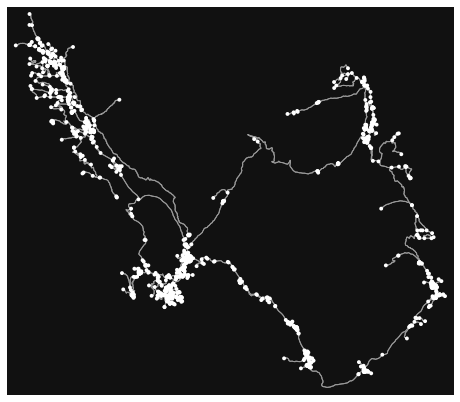

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [15]:
# To create buffer, need to first project to UTM (unit: meters)
buff = boundary.loc[['GLAC']].to_crs(epsg = 26912).buffer(8000) # For Glacier: NAD83 / UTM zone 12N
buff = gpd.GeoDataFrame(geometry = gpd.GeoSeries(buff))

# create network from that buffer
G = ox.graph_from_polygon(buff.to_crs(epsg = 4326).geometry[0], network_type = 'drive', simplify = True)
G = ox.project_graph(G, to_crs = 'epsg:4269') # Reproject
ox.plot_graph(G)

(2) For parks with concave shape (Zion and Acadia), better to use the bounding box instead of a buffer.

In [16]:
# # create bounding box based on park boundary
# bound = boundary.loc[[park]].total_bounds  
# # Specify the coordinates of four bounds
# north, south, east, west = bound[3], bound[1], bound[2], bound[0]
# # create network from that bounding box
# G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive', simplify = True)
# ox.plot_graph(G)

Convert the OSM road network to GeoPandas GeoDataFrame:

In [17]:
nodes, edges = ox.graph_to_gdfs(G, nodes = True, edges = True, node_geometry = True)
edges.head()

osmid  \
u        v        key                       
40656801 40853414 0               5719884   
         40656810 0               5533468   
         40885323 0    [5719884, 5549846]   
40853414 40656801 0               5719884   
         40853512 0               5546392   

                                                       name      highway  \
u        v        key                                                      
40656801 40853414 0                          Lodgepole Loop  residential   
         40656810 0                                     NaN  residential   
         40885323 0    [Slippery Bill Road, Lodgepole Loop]  residential   
40853414 40656801 0                          Lodgepole Loop  residential   
         40853512 0                                     NaN  residential   

                       oneway   length  \
u        v        key                    
40656801 40853414 0     False   18.957   
         40656810 0     False  257.073   
         40885323 0     False  248.138   
40853414 40656801 0     False   18.957   
         40853512 0     False  426.384   

                                                                geometry  \
u        v        key                                                      
40656801 40853414 0    LINESTRING (-113.43446 48.26584, -113.43420 48...   
         40656810 0    LINESTRING (-113.43446 48.26584, -113.43491 48...   
         40885323 0    LINESTRING (-113.43446 48.26584, -113.43454 48...   
40853414 40656801 0    LINESTRING (-113.43420 48.26584, -113.43446 48...   
         40853512 0    LINESTRING (-113.43420 48.26584, -113.43422 48...   

                      lanes  ref maxspeed bridge tunnel  
u        v        key                                    
40656801 40853414 0     NaN  NaN      NaN    NaN    NaN  
         40656810 0     NaN  NaN      NaN    NaN    NaN  
         40885323 0     NaN  NaN      NaN    NaN    NaN  
40853414 40656801 0     NaN  NaN      NaN    NaN    NaN  
         40853512 0     NaN  NaN      NaN    NaN    NaN

Choose a date that we would like to generate maps for. At the end of the day, we would like to compare the congestion conditions between the same time period of different years, such as the first Friday of August in 2018 vs. 2020.

In [18]:
day = '2018-08-02'

# change variable type
subset_gdf['date'] = pd.DatetimeIndex(subset_gdf.date) # convert string to datetime
subset_gdf['sg_mp__visits_by_day'] = pd.to_numeric(subset_gdf['sg_mp__visits_by_day'])  # convert to numeric

# filter data by the chosen date
poi_gdf = subset_gdf.loc[subset_gdf['date'] == day, 
                         ['placekey', 'date', 'sg_c__location_name', 'geometry', 'sg_mp__visits_by_day']].reset_index(drop = True)
poi_gdf

placekey       date               sg_c__location_name  \
0   zzy-222@3wy-prx-xwk 2018-08-02   Jammer Joe's Grill and Pizzeria   
1   zzw-222@3wy-q29-d9z 2018-08-02         Glacier Park Boat Company   
2   zzy-222@3wy-pbb-bx5 2018-08-02  Flathead Lake Biological Station   
3   222-222@3wy-q23-b8v 2018-08-02             Glacier National Park   
4   222-222@3wy-q29-8y9 2018-08-02                 Schoolhouse Gifts   
5   zzy-224@3wy-prx-td9 2018-08-02    Lake Mcdonald Lodge and Cabins   
6   zzy-223@3wy-q29-jjv 2018-08-02            Eddie's Cafe and Gifts   
7   zzy-222@3wy-q29-8vz 2018-08-02                     Lake McDonald   
8   zzw-222@3wy-m9q-mc5 2018-08-02                    Ptarmigan Room   
9   zzy-225@3wy-prx-td9 2018-08-02                    Lucke's Lounge   
10  zzy-226@3wy-prx-td9 2018-08-02               Lake McDonald Lodge   
11  zzy-222@3wy-t6w-435 2018-08-02                      Glacier Park   

                       geometry  sg_mp__visits_by_day  
0   POINT (-113.87642 48.61768)                     8  
1   POINT (-113.99294 48.52874)                    25  
2   POINT (-113.98850 48.52306)                     0  
3   POINT (-113.98663 48.50239)                     6  
4   POINT (-113.99352 48.52658)                     7  
5   POINT (-113.87916 48.61739)                     1  
6   POINT (-113.98852 48.52305)                     0  
7   POINT (-113.99403 48.52759)                    24  
8   POINT (-113.36454 48.49155)                     0  
9   POINT (-113.87915 48.61743)                     2  
10  POINT (-113.87918 48.61740)                     3  
11  POINT (-113.67304 48.79710)                     0

Plot entrance stations and POIs together with the park road network:

In [19]:
m = edges[edges.highway == 'secondary'].explore()
poi_gdf.drop(['date'], axis = 1).explore(m = m, 
                                         column = 'sg_mp__visits_by_day', 
                                         cmap = "RdBu_r",
                                         marker_type = 'circle',
                                         marker_kwds = {'radius': 1000,
                                                        'fill': True
                                                       }
                                        ) # POIs
entry_gdf.explore(m = m, 
                  marker_type = 'marker'
                 ) # entrances

In [20]:
# A function helps you to find the nearest OSM node from a given GeoDataFrame (cr. Dr.Park)
def find_nearest_osm(network, gdf):
    """
    # This function helps you to find the nearest OSM node from a given GeoDataFrame
    # If geom type is point, it will take it without modification, but 
    # IF geom type is polygon or multipolygon, it will take its centroid to calculate the nearest element. 
    
    Input: 
    - network (NetworkX MultiDiGraph): Network Dataset obtained from OSMnx
    - gdf (GeoDataFrame): stores locations in its `geometry` column 
    
    Output:
    - gdf (GeoDataFrame): will have `nearest_osm` column, which describes the nearest OSM node 
                          that was computed based on its geometry column
      
    """
    for idx, row in tqdm(gdf.iterrows(), total=gdf.shape[0]):
        if row.geometry.geom_type == 'Point':
            nearest_osm = ox.distance.nearest_nodes(network, 
                                                    X=row.geometry.x, 
                                                    Y=row.geometry.y
                                                   )
        elif row.geometry.geom_type == 'Polygon' or row.geometry.geom_type == 'MultiPolygon':
            nearest_osm = ox.distance.nearest_nodes(network, 
                                        X=row.geometry.centroid.x, 
                                        Y=row.geometry.centroid.y
                                       )
        else:
            print(row.geometry.geom_type)
            continue

        gdf.at[idx, 'nearest_osm'] = nearest_osm

    return gdf

Find the nearest OSM node for each POI within the park:

In [21]:
poi_gdf = find_nearest_osm(G, poi_gdf)
poi_gdf

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 94.72it/s]


placekey       date               sg_c__location_name  \
0   zzy-222@3wy-prx-xwk 2018-08-02   Jammer Joe's Grill and Pizzeria   
1   zzw-222@3wy-q29-d9z 2018-08-02         Glacier Park Boat Company   
2   zzy-222@3wy-pbb-bx5 2018-08-02  Flathead Lake Biological Station   
3   222-222@3wy-q23-b8v 2018-08-02             Glacier National Park   
4   222-222@3wy-q29-8y9 2018-08-02                 Schoolhouse Gifts   
5   zzy-224@3wy-prx-td9 2018-08-02    Lake Mcdonald Lodge and Cabins   
6   zzy-223@3wy-q29-jjv 2018-08-02            Eddie's Cafe and Gifts   
7   zzy-222@3wy-q29-8vz 2018-08-02                     Lake McDonald   
8   zzw-222@3wy-m9q-mc5 2018-08-02                    Ptarmigan Room   
9   zzy-225@3wy-prx-td9 2018-08-02                    Lucke's Lounge   
10  zzy-226@3wy-prx-td9 2018-08-02               Lake McDonald Lodge   
11  zzy-222@3wy-t6w-435 2018-08-02                      Glacier Park   

                       geometry  sg_mp__visits_by_day  nearest_osm  
0   POINT (-113.87642 48.61768)                     8  960036734.0  
1   POINT (-113.99294 48.52874)                    25  960035394.0  
2   POINT (-113.98850 48.52306)                     0   41049461.0  
3   POINT (-113.98663 48.50239)                     6  960035763.0  
4   POINT (-113.99352 48.52658)                     7  960036264.0  
5   POINT (-113.87916 48.61739)                     1  960033938.0  
6   POINT (-113.98852 48.52305)                     0   41049461.0  
7   POINT (-113.99403 48.52759)                    24  960036264.0  
8   POINT (-113.36454 48.49155)                     0  960034402.0  
9   POINT (-113.87915 48.61743)                     2  960033938.0  
10  POINT (-113.87918 48.61740)                     3  960033938.0  
11  POINT (-113.67304 48.79710)                     0  960035071.0

Similarly, find the nearest OSM node for each entrance station:

In [22]:
entry_gdf = find_nearest_osm(G, entry_gdf)
entry_gdf

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 113.20it/s]


unitCode          entrance                                 lat_lon  \
0     GLAC     West Entrance   48.50642809317048, -113.9876462668435   
1     GLAC             Camas  48.58720431401561, -114.03313537578087   
2     GLAC        Polebridge  48.78354575523783, -114.28056051716855   
3     GLAC      Many Glacier  48.82248401654224, -113.57974127136741   
4     GLAC      Saint Mary's  48.74693105028238, -113.43933340609424   
5     GLAC      Two Medicine  48.50504411336611, -113.33000493600153   
6     GLAC  Walton/Goat Lick  48.25888956992005, -113.57509950229125   

                 lat                   lon                     geometry  \
0  48.50642809317048    -113.9876462668435  POINT (-113.98765 48.50643)   
1  48.58720431401561   -114.03313537578087  POINT (-114.03314 48.58720)   
2  48.78354575523783   -114.28056051716855  POINT (-114.28056 48.78355)   
3  48.82248401654224   -113.57974127136741  POINT (-113.57974 48.82248)   
4  48.74693105028238   -113.43933340609424  POINT (-113.43933 48.74693)   
5  48.50504411336611   -113.33000493600153  POINT (-113.33000 48.50504)   
6  48.25888956992005   -113.57509950229125  POINT (-113.57510 48.25889)   

   nearest_osm  
0   43157459.0  
1  957706395.0  
2  960034730.0  
3  960037666.0  
4   41052104.0  
5  970994448.0  
6  960035238.0

#### Calculate the times that each edges has been passed through by visitors _on that day_:

In [23]:
edges['travel_times'] = 0

for idx_p, row_p in poi_gdf.iterrows(): # loop for each POI
    
    length = []
    
    for idx_e, row_e in entry_gdf.iterrows(): # Loop for each entrance station
        
        # Calculate the shortest driving distance from every entrance station to a specific POI
        temp_length = nx.shortest_path_length(G = G, 
                                  source = row_e['nearest_osm'], 
                                  target = row_p['nearest_osm'], 
                                  weight = 'length',
                                  method = 'dijkstra'
                                 )
        length.append(temp_length)
    
    # Find the nearest entrance station from that POI
    val, idx = min((val, idx) for (idx, val) in enumerate(length)) # get the position in the list with smallest number
    
    # Get shortest paths from the nearest entrances to that POI. Visitors are assumed to take this route to enter the park.
    start_route = nx.shortest_path(G = G, 
                                   source = entry_gdf.loc[idx, 'nearest_osm'], 
                                   target = row_p['nearest_osm'], 
                                   weight = 'length',
                                   method = 'dijkstra'
                                  )
    
    for i in range(len(start_route) - 1):
        cum_sum = edges.loc[(edges.index.get_level_values('u') == start_route[i]) & (edges.index.get_level_values('v') == start_route[i+1]), 'travel_times'] + row_p['sg_mp__visits_by_day']
        edges.loc[(edges.index.get_level_values('u') == start_route[i]) & (edges.index.get_level_values('v') == start_route[i+1]), 'travel_times'] = cum_sum
    
    # Get shortest paths from the that POI to the nearest entrances. Visitors are assumed to take this route to exit the park.
    back_route = nx.shortest_path(G = G, 
                                  source = row_p['nearest_osm'], 
                                  target = entry_gdf.loc[idx, 'nearest_osm'], 
                                  weight = 'length',
                                  method = 'dijkstra'
                                 )
    
    for i in range(len(back_route) - 1):
        cum_sum = edges.loc[(edges.index.get_level_values('u') == back_route[i]) & (edges.index.get_level_values('v') == back_route[i+1]), 'travel_times'] + row_p['sg_mp__visits_by_day']
        edges.loc[(edges.index.get_level_values('u') == back_route[i]) & (edges.index.get_level_values('v') == back_route[i+1]), 'travel_times'] = cum_sum

In [24]:
# A preview of the summary statistiscs
edges.travel_times.describe() 

count    2519.000000
mean        0.344581
std         4.246239
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        70.000000
Name: travel_times, dtype: float64

#### Now we are ready to visualize the congestion conditions: color code edges using Red/Yellow/Green palettes, based on the number of visitors who may pass through each road segment.

In [25]:
m = edges.explore(tiles = 'Stamen Terrain',
                  column = 'travel_times', 
                  cmap = 'RdYlGn_r',
                  scheme = 'NaturalBreaks',
                  k = 5,
                  vmin = 0,
                  highlight = True,
                  tooltip = ['name', 'travel_times'], # displayed upon hovering
                  popup = True, # all columns displayed upon clicking
                  legend_kwds = {
                      'caption': 'Congestion',
                      'scale': False,
                      'colorbar': False
                  }
                 )
entry_gdf.explore(m = m, 
                  marker_type = 'marker',
                  tooltip = ['entrance']
                 ) # entrances